In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

In [76]:
df = pd.read_excel('hargaRumahJaksel.xlsx', header=None)
df.columns = ['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']

In [77]:
#hapus kolom jaksel karena semua nilainya sama
df = df.drop(columns=["KOTA"])
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,NaN,NaN,NaN,NaN,NaN,NaN
1,HARGA,LT,LB,JKT,JKM,GRS
2,28000000000,1100,700,5,6,ADA
3,19000000000,824,800,4,4,ADA
4,4700000000,500,400,4,3,ADA


In [78]:
df = df.drop([0,1]) #hapus baris 1 dan 2 karena tidak bernilai

In [79]:
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
2,28000000000,1100,700,5,6,ADA
3,19000000000,824,800,4,4,ADA
4,4700000000,500,400,4,3,ADA
5,4900000000,251,300,5,4,ADA
6,28000000000,1340,575,4,5,ADA


In [80]:
df.shape #jumlah baris dan kolom

(1001, 6)

In [81]:
df["HARGA"] = df["HARGA"] / 1000000000 #menyederhanakan harga rumah

In [82]:
df.head()

,HARGA,LT,LB,JKT,JKM,GRS
2,28.0,1100,700,5,6,ADA
3,19.0,824,800,4,4,ADA
4,4.7,500,400,4,3,ADA
5,4.9,251,300,5,4,ADA
6,28.0,1340,575,4,5,ADA


In [83]:
df.isnull().sum() #mengecek apakah ada missing data

HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
dtype: int64

In [84]:
#mengubah fitur garasi yang semula bernilai "ADA" menjadi 1, dan "TIDAK ADA" menjadi 0
df["GRS"] = df["GRS"].replace({"ADA" : 1, "TIDAK ADA" : 0})
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10848\1586998409.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["GRS"] = df["GRS"].replace({"ADA" : 1, "TIDAK ADA" : 0})


,HARGA,LT,LB,JKT,JKM,GRS
2,28.0,1100,700,5,6,1
3,19.0,824,800,4,4,1
4,4.7,500,400,4,3,1
5,4.9,251,300,5,4,1
6,28.0,1340,575,4,5,1


In [85]:
kolom_numerik = ['HARGA', 'LT', 'LB', 'JKT', 'JKM']
df[kolom_numerik] = df[kolom_numerik].apply(pd.to_numeric, errors='coerce')
df['HARGA'] = df['HARGA'].apply(lambda x: "{:.2f}".format(x))

df.head()

,HARGA,LT,LB,JKT,JKM,GRS
2,28.00,1100,700,5,6,1
3,19.00,824,800,4,4,1
4,4.70,500,400,4,3,1
5,4.90,251,300,5,4,1
6,28.00,1340,575,4,5,1


In [86]:
df.describe()

,LT,LB,JKT,JKM,GRS
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,530.504496,487.275724,4.457542,3.940060,0.778222
std,531.069773,452.872262,2.004606,1.903261,0.415650
min,22.000000,38.000000,1.000000,1.000000,0.000000
25%,220.000000,300.000000,4.000000,3.000000,1.000000
50%,400.000000,411.000000,4.000000,4.000000,1.000000
75%,677.000000,600.000000,5.000000,4.000000,1.000000
max,6790.000000,10000.000000,27.000000,27.000000,1.000000


<Axes: >

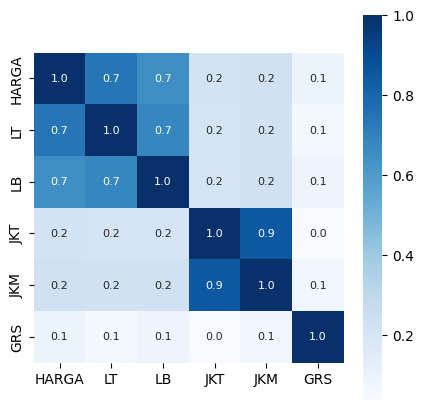

In [87]:
#understanding the correlation between features in dataset
#positif correlation = jika 1 variable bertambah maka variable lain bertambah
#negatif correlation = jika 1 variable berkurang maka variable lain berkurang

correlation = df.corr()

#membuat heatmap untuk memahami korelasi
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#cbar = color bar di kanan
#fmt = hanya ada 1 value setelah angka desimal


In [88]:
#split feature dan lable
x = df.drop(['HARGA'], axis=1)
y = df['HARGA']

In [89]:
print(x)
print(y)

        LT   LB  JKT  JKM  GRS
2     1100  700    5    6    1
3      824  800    4    4    1
4      500  400    4    3    1
5      251  300    5    4    1
6     1340  575    4    5    1
...    ...  ...  ...  ...  ...
998    488  550    6    5    1
999    209  270    4    4    1
1000   692  400    4    3    0
1001   102  140    4    3    0
1002    63  110    3    3    0

[1001 rows x 5 columns]
2       28.00
3       19.00
4        4.70
5        4.90
6       28.00
        ...  
998     16.00
999      4.50
1000    29.00
1001     1.70
1002     1.25
Name: HARGA, Length: 1001, dtype: object


In [90]:
#SPLIT DATA into training dan test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)
#pembagian data menjadi set pelatihan dan pengujian akan sama setiap kode di jalankan
#test size 0.2 berarti test datanya 20%

In [91]:
print(x_train)

       LT    LB  JKT  JKM  GRS
177   477   520    4    3    1
512  1470  2000    7    7    1
455   806   700    4    4    1
376   200   400    4    4    1
202    78   185    4    4    0
..    ...   ...  ...  ...  ...
536   462   350    3    3    1
586   164   150    4    4    1
495   435   500    4    4    1
529   389   450    7    4    1
170   663   530    7    8    1

[800 rows x 5 columns]


In [92]:
# model training xgboost regressor

#load model
model = XGBRegressor()


In [93]:
#training the model with x_train
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
#evaluation

#prediction on training data

#accuracy for prediction on training data
training_data_prediction = model.predict(x_train)

In [95]:
print(training_data_prediction)

[ 17.216728    56.198315    23.29115      7.8583903    3.3968835
  17.560694    18.106237    18.448465     2.4050188    4.945226
   7.4276657    6.833921    38.524708    12.544029    19.74246
  15.001995    21.937714    12.544029    11.175158    28.83459
  16.639389     3.3849545    8.20936     16.922163    18.771067
  94.92788     11.793079     6.1039777    3.3442707   12.585208
   5.5419693    4.9332423    1.6616926    9.2184305    5.6721687
  40.041843    22.066055     6.3780537   14.359966    17.360147
   9.490495    37.47718      9.386275    35.3007       5.896673
  17.909061     5.099921    21.890234    14.957813    16.476997
  20.953093     9.498305    15.68053     12.887906    21.885498
  14.340983    38.36226      4.8692155   20.810438     4.8801293
  89.450554    24.772028    17.340452     6.319159    10.877188
  11.10221      6.671868    15.567739    21.223469     9.88694
  10.642946    14.414714    21.885498     0.59874964  28.009539
  16.027153    12.018554    56.07763    

In [96]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print("mean absolute error : ", score_2)

R squared error :  0.9971559643745422
mean absolute error :  0.7315461653798817


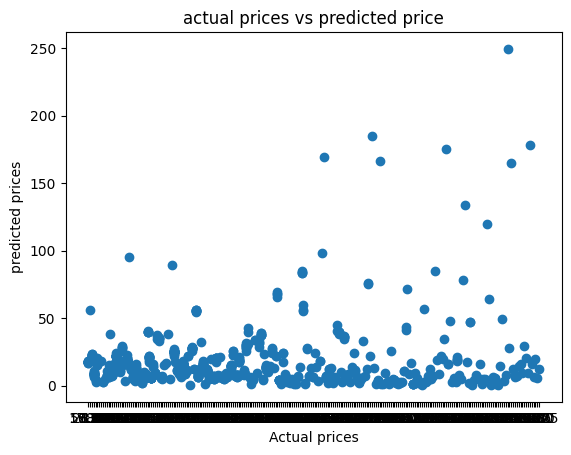

In [97]:
#visualizing the actual prices and predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted price")
plt.show()

In [98]:
#prediction on test data
test_data_prediction = model.predict(x_test)


In [99]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print("mean absolute error : ", score_2)

R squared error :  0.3773787021636963
mean absolute error :  5.531131507235381
